In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets


In [36]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [37]:
train_images, test_images = train_images / 255.0, test_images / 255.0


train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [48]:
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x  

    
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

   
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)


    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x


In [50]:
def resnet10_model(input_shape=(32, 32, 3)):
    input = layers.Input(shape=input_shape)

    
    x = layers.Conv2D(16, (3, 3), padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    
    x = residual_block(x, 16)  
    x = residual_block(x, 16) 

    x = residual_block(x, 32, stride=2)  
    x = residual_block(x, 32)  

   
    x = layers.GlobalAveragePooling2D()(x)

    
    x = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input, outputs=x)
    return model


In [51]:
model_resnet10 = resnet10_model(input_shape=(32, 32, 3))

model_resnet10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


In [52]:
history_resnet10 = model_resnet10.fit(train_images, train_labels, epochs=10,
                                      validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.4142 - loss: 1.6227 - val_accuracy: 0.3944 - val_loss: 1.9449
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6087 - loss: 1.1046 - val_accuracy: 0.4853 - val_loss: 1.4913
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6660 - loss: 0.9464 - val_accuracy: 0.4058 - val_loss: 1.9300
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6959 - loss: 0.8724 - val_accuracy: 0.6122 - val_loss: 1.1147
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7136 - loss: 0.8102 - val_accuracy: 0.6737 - val_loss: 0.9376
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7351 - loss: 0.7610 - val_accuracy: 0.6091 - val_loss: 1.1739
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7550 - loss: 0.7140 - val_accuracy: 0.6458 - val_loss: 1.0088
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7619 - loss: 0.681

In [53]:
test_loss, test_acc = model_resnet10.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6363 - loss: 1.1259
Test accuracy: 63.11%


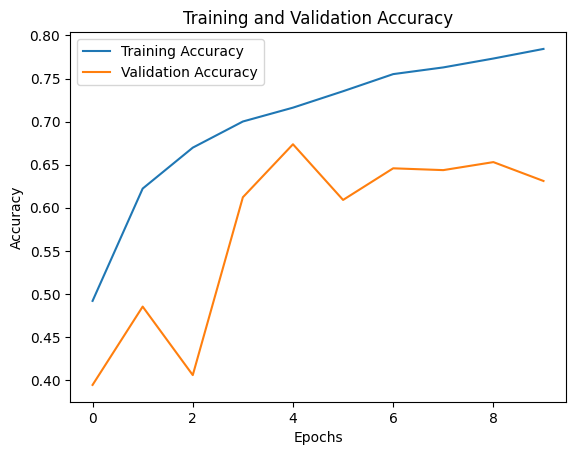

In [54]:
import matplotlib.pyplot as plt


plt.plot(history_resnet10.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet10.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [55]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.1 MB/s eta 0:00:00


In [56]:
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x  

    # First convolution layer
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second convolution layer
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut (if needed, change it to match output dimensions)
    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding the shortcut to the output
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x


In [59]:
def resnet10_model(input_shape=(32, 32, 3), filters=16, kernel_size=3, learning_rate=0.001):
    input = layers.Input(shape=input_shape)

    # Initial Convolution Layer
    x = layers.Conv2D(filters, (kernel_size, kernel_size), padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual Blocks
    x = residual_block(x, filters)
    x = residual_block(x, filters)

    x = residual_block(x, filters * 2, stride=2)
    x = residual_block(x, filters * 2)

    # Global Average Pooling to reduce dimensions
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layer for classification
    x = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input, outputs=x)

    # Compile model with variable learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [60]:
def model_builder(hp):
    # Hyperparameters
    filters = hp.Int('filters', min_value=16, max_value=64, step=16)
    kernel_size = hp.Int('kernel_size', min_value=3, max_value=5, step=2)
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')

    model = resnet10_model(filters=filters, kernel_size=kernel_size, learning_rate=learning_rate)

    return model

In [62]:

import keras_tuner as kt

tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=5,  # Number of trials (hyperparameter combinations to test)
    executions_per_trial=1,
    directory='my_dir',
    project_name='resnet10_hyperparam_tuning'
)

In [63]:
tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Trial 5 Complete [00h 01m 58s]
val_accuracy: 0.45879998803138733

Best val_accuracy So Far: 0.8274000287055969
Total elapsed time: 00h 19m 20s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 86 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8275 - loss: 0.5362
Test Accuracy: 82.74%


In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotations in the range (0 to 20 degrees)
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shearing transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(train_images)

# Train the model using augmented data
history_with_augmentation = best_model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                                           epochs=10,
                                           validation_data=(test_images, test_labels))

# Evaluate the model after augmentation
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f'Test Accuracy with Data Augmentation: {test_acc * 100:.2f}%')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 29ms/step - accuracy: 0.7608 - loss: 0.7272 - val_accuracy: 0.7920 - val_loss: 0.6623
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7821 - loss: 0.6317 - val_accuracy: 0.7534 - val_loss: 0.8214
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8001 - loss: 0.5825 - val_accuracy: 0.7928 - val_loss: 0.6513
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.8076 - loss: 0.5534 - val_accuracy: 0.7497 - val_loss: 0.7903
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8178 - loss: 0.5329 - val_accuracy: 0.7690 - val_loss: 0.7688
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.8256 - loss: 0.5053 - val_accuracy: 0.8182 - val_loss: 0.5496
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8311 - loss: 0.4914 - val_accuracy: 0.7967 - val_loss: 0.6567
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8375 - loss: 0.47

In [65]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate the model with data augmentation
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f'Test Accuracy with Data Augmentation: {test_acc * 100:.2f}%')

# Make predictions on the test set
test_predictions = best_model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)  # Convert one-hot to class labels
test_labels_class = np.argmax(test_labels, axis=1)  # Convert one-hot to class labels

# Generate the classification report
report = classification_report(test_labels_class, test_predictions, target_names=[str(i) for i in range(10)])
print("\nClassification Report (with Data Augmentation):")
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8172 - loss: 0.5956
Test Accuracy with Data Augmentation: 81.70%
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step

Classification Report (with Data Augmentation):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.85      0.94      0.89      1000
           2       0.82      0.77      0.79      1000
           3       0.84      0.59      0.70      1000
           4       0.92      0.68      0.78      1000
           5       0.87      0.72      0.79      1000
           6       0.65      0.97      0.78      1000
           7       0.84      0.92      0.87      1000
           8       0.98      0.76      0.86      1000
           9       0.75      0.95      0.84      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.81     10000
weighted avg       0.83      0.82      0.81     10000



In [66]:
best_model.save('resnet10_model.h5')

In [67]:
import time
import numpy as np

# Assume `best_model` is the model you obtained after hyperparameter tuning

# Select a single sample from the test set
sample = test_images[0:1]  # Selecting a single image (shape: (1, 32, 32, 3))

# Record the start time
start_time = time.time()

# Perform inference (prediction) on the sample
best_model.predict(sample)

# Record the end time
end_time = time.time()

# Calculate the latency (in seconds)
latency = end_time - start_time
print(f"Latency for processing a single sample: {latency:.6f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step
Latency for processing a single sample: 1.045408 seconds
